# Module 5: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Understand what can cause violations in the linear regression assumptions.
2. Enhance your skills in identifying and diagnosing violated assumptions.
3. Learn some basic methods of addressing violated assumptions.


General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [1]:
# Load Required Packages
library(ggplot2)

## Problem 1: Let's Violate Some Assumptions!

When looking at a single plot, it can be difficult to discern the different assumptions being violated. In the following problem, you will simulate data that purposefully violates each of the four linear regression assumptions. Then we can observe the different diagnostic plots for each of those assumptions.

#### 1. (a) Linearity

Generate SLR data that violates the linearity assumption, but maintains the other assumptions. Create a scatterplot for these data using ggplot.

Then fit a linear model to these data and comment on where you can diagnose nonlinearity in the diagnostic plots.

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

`geom_smooth()` using formula 'y ~ x'



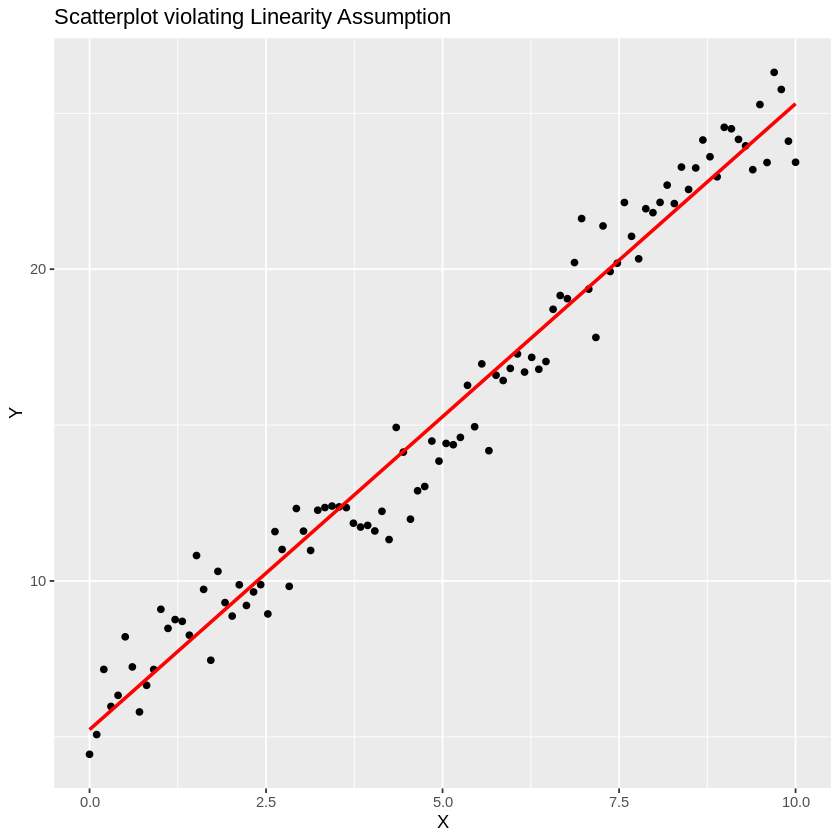

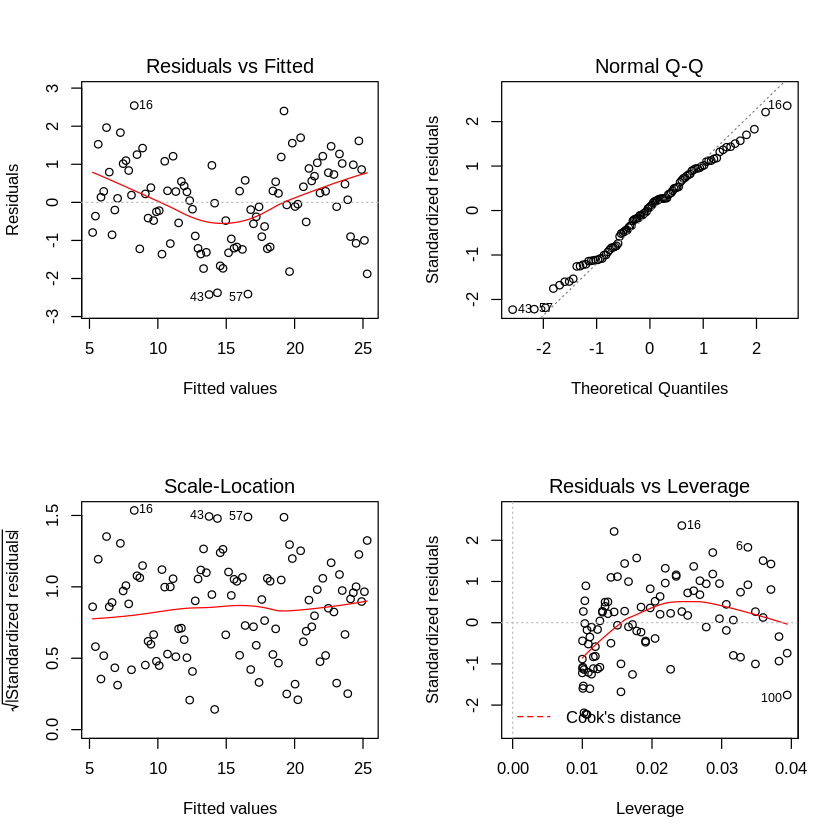

In [2]:
# Load necessary libraries
library(ggplot2)
library(tidyverse)

# Set seed for reproducibility
set.seed(123)

# Generate data
n <- 100
x <- seq(0, 10, length.out = n)
y <- 5 + 2 * x + sin(x) + rnorm(n, mean = 0, sd = 1)

# Create a data frame
data_linearity <- data.frame(x, y)

# Scatterplot
ggplot(data_linearity, aes(x = x, y = y)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Scatterplot violating Linearity Assumption",
       x = "X", y = "Y")

# Fit linear model
model_linearity <- lm(y ~ x, data = data_linearity)

# Diagnostic plots
par(mfrow = c(2, 2))
plot(model_linearity)


Comment on Diagnosing Nonlinearity:

- In the Residuals vs Fitted plot, we would expect to see a pattern in the residuals, such as a curve, indicating that the relationship between the predictor and the response is not linear.
- The Q-Q plot may still show points lying along the reference line if the errors are normally distributed, but it won't help much in diagnosing nonlinearity.

#### 1. (b) Homoskedasticity

Simulate another SLR dataset that violates the constant variance assumption, but maintains the other assumptions. Then fit a linear model to these data and comment on where you can diagnose non-constant variance in the diagnostic plots.

`geom_smooth()` using formula 'y ~ x'



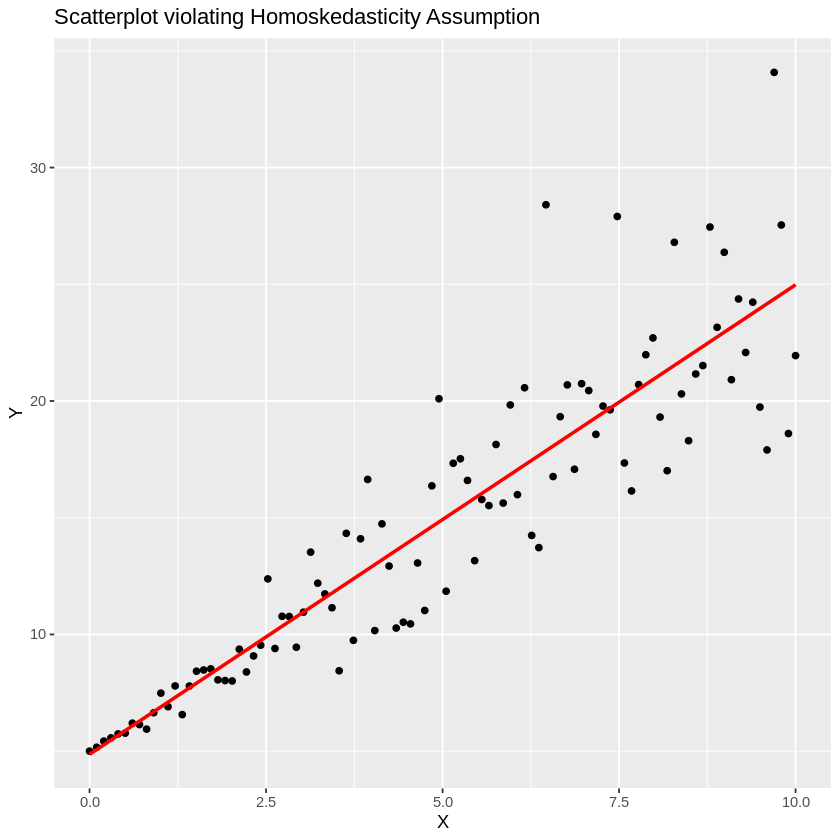

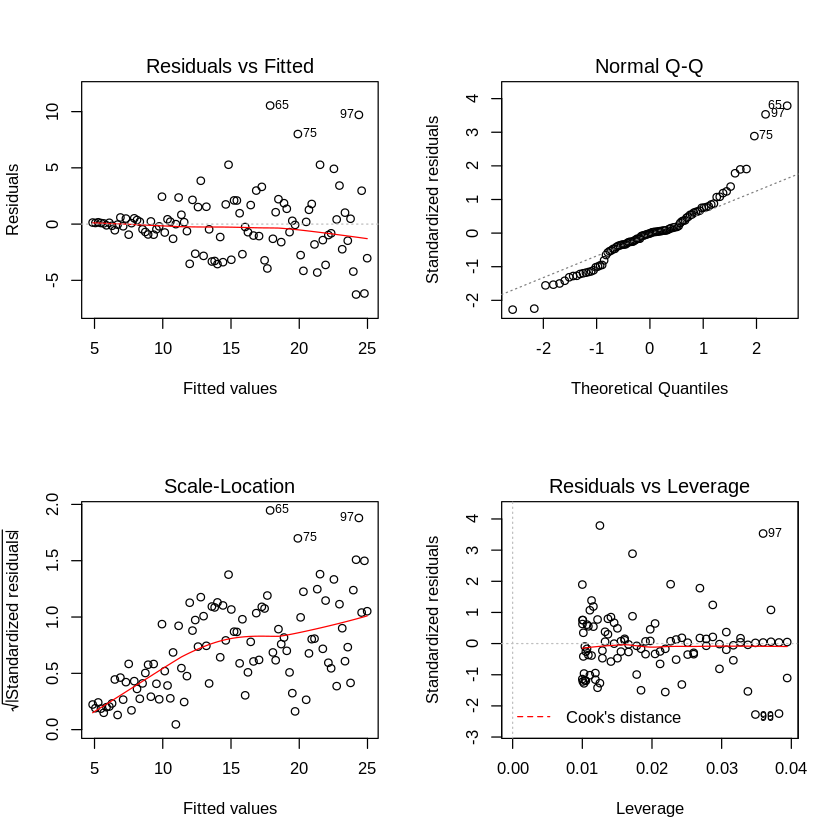

In [3]:
# Generate data
y <- 5 + 2 * x + rnorm(n, mean = 0, sd = 0.5 * x)

# Create a data frame
data_homoskedasticity <- data.frame(x, y)

# Scatterplot
ggplot(data_homoskedasticity, aes(x = x, y = y)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Scatterplot violating Homoskedasticity Assumption",
       x = "X", y = "Y")

# Fit linear model
model_homoskedasticity <- lm(y ~ x, data = data_homoskedasticity)

# Diagnostic plots
par(mfrow = c(2, 2))
plot(model_homoskedasticity)


Comment on Diagnosing Non-constant Variance:

- In the Residuals vs Fitted plot, we would observe a funnel shape or increasing spread of residuals as the fitted values increase, indicating heteroskedasticity.
- The Scale-Location plot would also show a pattern, where the spread (variance) of the residuals increases with fitted values.

#### 1. (c) Independent Errors

Repeat the above process with simulated data that violates the independent errors assumption.

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'



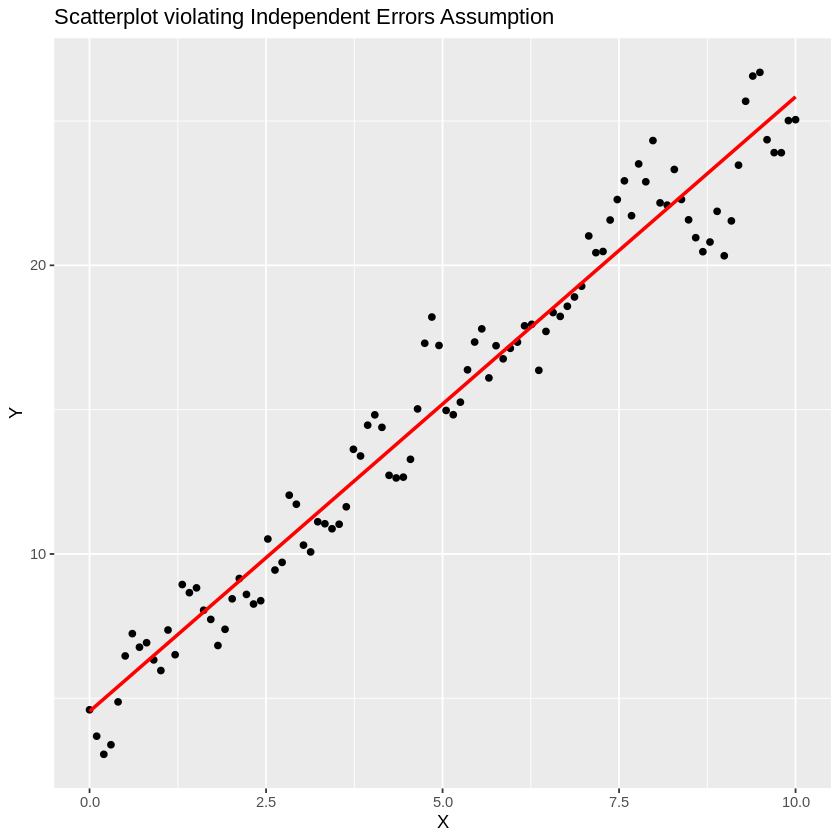

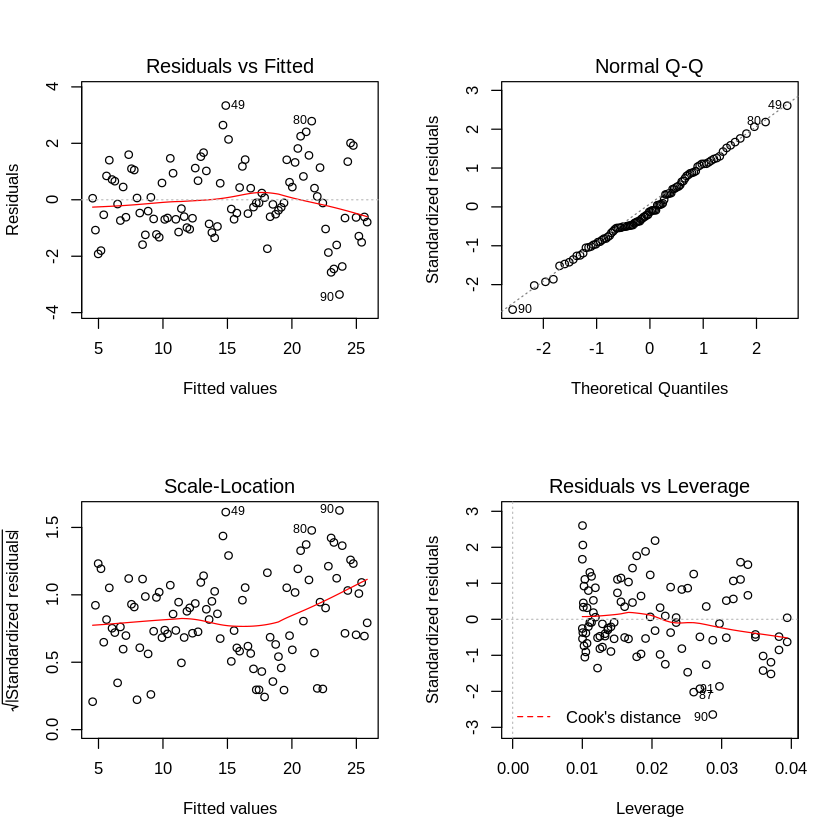

In [4]:
# Generate data
errors <- arima.sim(n = n, list(ar = 0.7))
y <- 5 + 2 * x + errors

# Create a data frame
data_independent_errors <- data.frame(x, y)

# Scatterplot
ggplot(data_independent_errors, aes(x = x, y = y)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Scatterplot violating Independent Errors Assumption",
       x = "X", y = "Y")

# Fit linear model
model_independent_errors <- lm(y ~ x, data = data_independent_errors)

# Diagnostic plots
par(mfrow = c(2, 2))
plot(model_independent_errors)


Comment on Diagnosing Independence of Errors:

- The Residuals vs Fitted plot might show a pattern, but it can be subtle.
- The most direct way to diagnose this issue is with the Residuals vs Leverage plot, which might indicate a pattern if the residuals are not independent.
- Additionally, checking the Durbin-Watson statistic for autocorrelation can help in diagnosing this violation.

#### 1. (d) Normally Distributed Errors

Only one more to go! Repeat the process again but simulate the data with non-normal errors.

`geom_smooth()` using formula 'y ~ x'



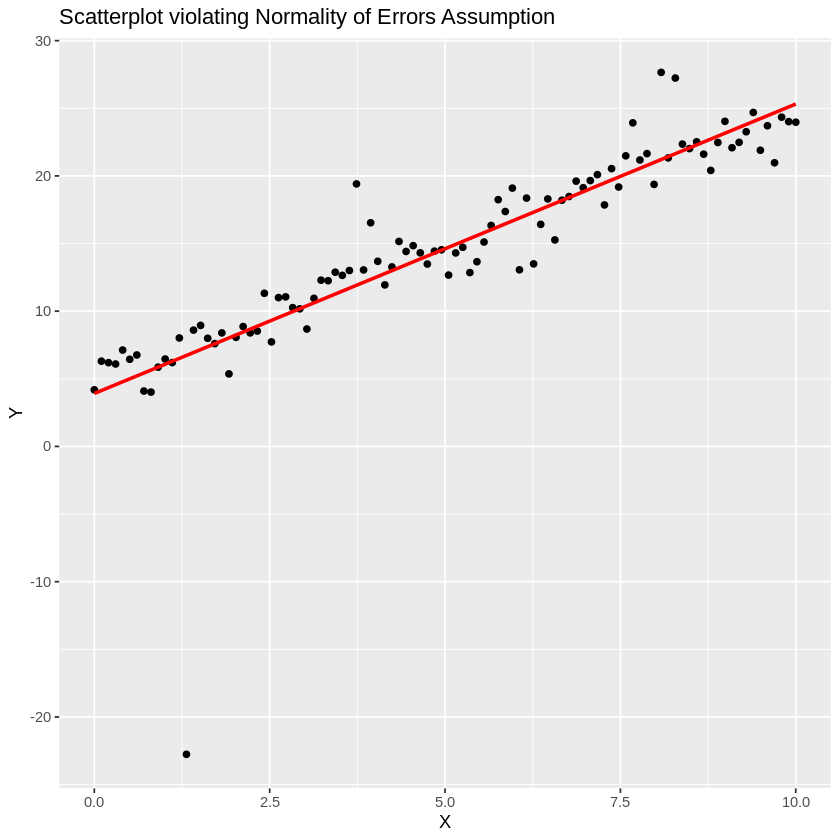

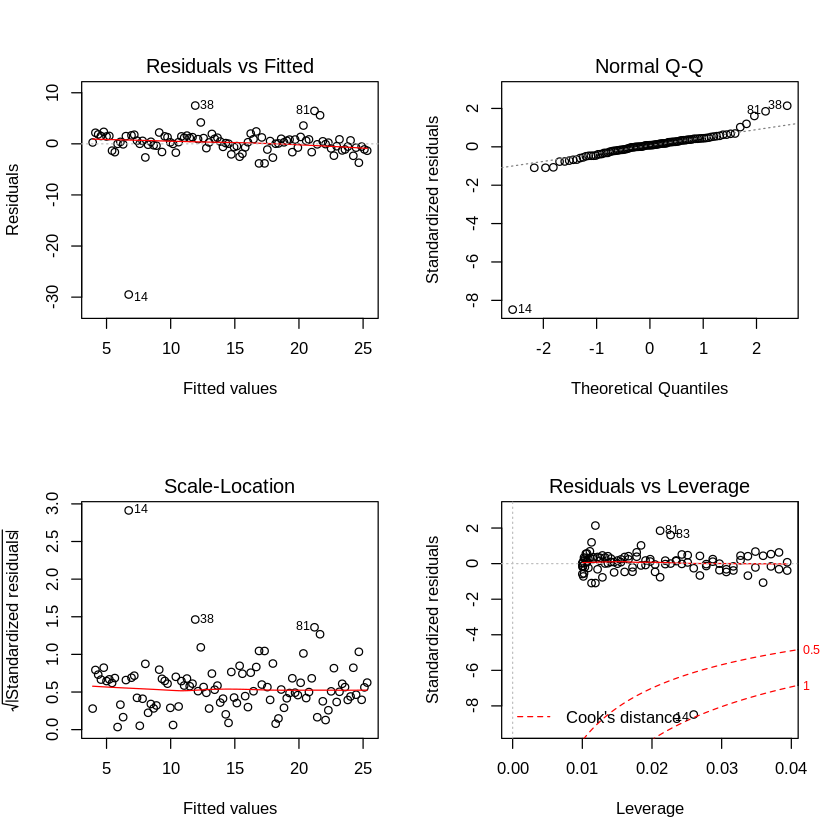

In [5]:
# Generate data
y <- 5 + 2 * x + rt(n, df = 2)  # t-distributed errors, heavy-tailed

# Create a data frame
data_normal_errors <- data.frame(x, y)

# Scatterplot
ggplot(data_normal_errors, aes(x = x, y = y)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Scatterplot violating Normality of Errors Assumption",
       x = "X", y = "Y")

# Fit linear model
model_normal_errors <- lm(y ~ x, data = data_normal_errors)

# Diagnostic plots
par(mfrow = c(2, 2))
plot(model_normal_errors)


Comment on Diagnosing Non-Normal Errors:

- The Q-Q plot would show significant deviations from the reference line, indicating that the residuals are not normally distributed.
- The Residuals vs Fitted plot might not be very informative for this specific violation.

# Problem 2: Hats for Sale

Recall that the *hat* or *projection* matrix is defined as 

$$H = X(X^TX)^{-1}X^T.$$

The goal of this question is to use the hat matrix to prove that the fitted values, $\widehat{\mathbf Y}$, and the residuals, $\widehat{\boldsymbol\varepsilon}$, are uncorrelated. It's a bit of a process, so we will do it in steps.

#### 2. (a) Show that $\widehat{Y} = HY$. That is, $H$ "puts a hat on" $Y$.

The fitted values in a linear regression model are given by:

$$Y^ = Xβ$$

where β^ is the estimated coefficient vector.



The least squares estimate of ββ is:

$$β^ = (XTX)−1 * XT *Y$$



Substituting this into the expression for Y^:

$$Y^=X(XTX)−1XTY$$


We can recognize that this can be written as:

$$Y^ = HY$$

where

$$ H = X(XTX)^−1 XT $$

is the hat matrix.

#### 2. (b) Show that $H$ is symmetric: $H = H^T$.

By definition:

$$H = X(X^TX)−1 * X^T $$

Taking the transpose of H:

$$H^T=(X(X^TX)^−1 XT)^T$$

Using the property of transposes $(AB)^T=B^TA^T$:

$$H^T=(X^T)^T((X^TX)^−1)X^T$$
$$H^T=X((X^TX)^−1)X^T$$

$$Since (X^TX)^−1 is symmetric : H^T=X(X^TX)^−1 X^T$$

Therefore:

$$H^T=H$$

#### 2. (c) Show that $H(I_n - H) = 0_n$, where $0_n$ is the zero matrix of size $n \times n$.**

First, consider the identity matrix $I n:$
$I n−H$

Now, multiply HH by this expression:

$H(I n−H)=HI n−H^2$

$H(I n−H)=H−H^2$

Since H is an idempotent matrix (i.e., H^2=H):
$H^2=H = H−H=0nH$

Thus:
$H(I n − H) =0 n$

**2. (d) Stating that $\widehat{\mathbf Y}$ is uncorrelated with $\widehat{\boldsymbol\varepsilon}$ is equivalent to showing that these vectors are orthogonal.\* That is, we want their dot product to equal zero:**

$$ \widehat{\mathbf Y}^T\widehat{\boldsymbol\varepsilon} = 0.$$ 

Prove this result. Also explain why being uncorrelated, in this case, is equivalent to the being orthogonal.

We know:

$Y^=HY$ and

$ε^=Y−Y^=Y−HY=(In−H)Yε$


Now, compute the dot product:

$Y^Tε^=(HY)T(In−H)Y$

Since H is symmetric:

$(HY)T=YTHT=YTH$

Thus:

$Y^Tε^=YTH(In−H)Y$

From part (c), we know:

$H(In−H)=0n$

Therefore:

$YTH(In−H)Y=YT0nY=0$

Thus:

$Y^Tε^=0$

#### 2.(e) Why is this result important in the practical use of linear regression?

This result is important because:

- Model Validity: Uncorrelated fitted values and residuals indicate that the linear model has been correctly specified. If they were correlated, it would suggest that the model is not capturing some aspect of the data correctly.

- Error Independence: The orthogonality helps ensure that the residuals represent the random noise in the data and are not related to the predicted values. This is crucial for the validity of statistical tests and confidence intervals based on the model.

- Goodness of Fit: It simplifies the interpretation of the model diagnostics and ensures that the residuals are used correctly in calculating measures like R-squared.

- Assumption Verification: Verifying that residuals are uncorrelated with fitted values helps in diagnosing and confirming that the assumptions of the linear regression model are met, which is essential for making reliable inferences from the model.

## Problem 3: Model Diagnosis

We here at the University of Colorado's Department of Applied Math love Bollywood movies. So, let's analyze some data related to them!

We want to determine if there is a linear relation between the amount of money spent on a movie (it's budget) and the amount of money the movie makes. Any venture capitalists among you will certianly hope that there is at least some relation. So let's get to modelling!

#### 3. (a) Initial Inspection

Load in the data from local directory and create a linear model with `Gross` as the response and `Budget` as the feature. The data is stored in the same local directory and is called `bollywood_boxoffice.csv`. Thank the University of Florida for this specific dataset.

Specify whether each of the four regression model assumptions are being violated.

Data Source: http://www.bollymoviereviewz.com

                  Movie         Gross            Budget      
 1920London          :  1   Min.   :  0.63   Min.   :  4.00  
 2 States\xa0        :  1   1st Qu.:  9.25   1st Qu.: 19.00  
 24(Tamil,Telugu)    :  1   Median : 29.38   Median : 34.50  
 Aashiqui 2          :  1   Mean   : 53.39   Mean   : 45.25  
 AeDilHainMushkil\xa0:  1   3rd Qu.: 70.42   3rd Qu.: 70.00  
 AGentleman          :  1   Max.   :500.75   Max.   :150.00  
 (Other)             :184                                    

                  Movie         Gross            Budget      
 1920London          :  1   Min.   :  0.63   Min.   :  4.00  
 2 States\xa0        :  1   1st Qu.:  9.25   1st Qu.: 19.00  
 24(Tamil,Telugu)    :  1   Median : 29.38   Median : 34.50  
 Aashiqui 2          :  1   Mean   : 53.39   Mean   : 45.25  
 AeDilHainMushkil\xa0:  1   3rd Qu.: 70.42   3rd Qu.: 70.00  
 AGentleman          :  1   Max.   :500.75   Max.   :150.00  
 (Other)             :184                                    

'data.frame':	190 obs. of  3 variables:
 $ Movie : Factor w/ 190 levels "1920London","2 States\xa0",..: 48 74 72 54 35 96 69 2 105 141 ...
 $ Gross : num  95.64 55.65 110.01 11.16 5.19 ...
 $ Budget: num  36 77 90 16 9.5 4.5 26 36 39 18 ...



Call:
lm(formula = Gross ~ Budget, data = bollywood)

Residuals:
    Min      1Q  Median      3Q     Max 
-140.48  -21.39   -6.06    7.27  399.36 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -9.120      6.112  -1.492    0.137    
Budget         1.381      0.108  12.792   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.6 on 188 degrees of freedom
Multiple R-squared:  0.4653,	Adjusted R-squared:  0.4625 
F-statistic: 163.6 on 1 and 188 DF,  p-value: < 2.2e-16


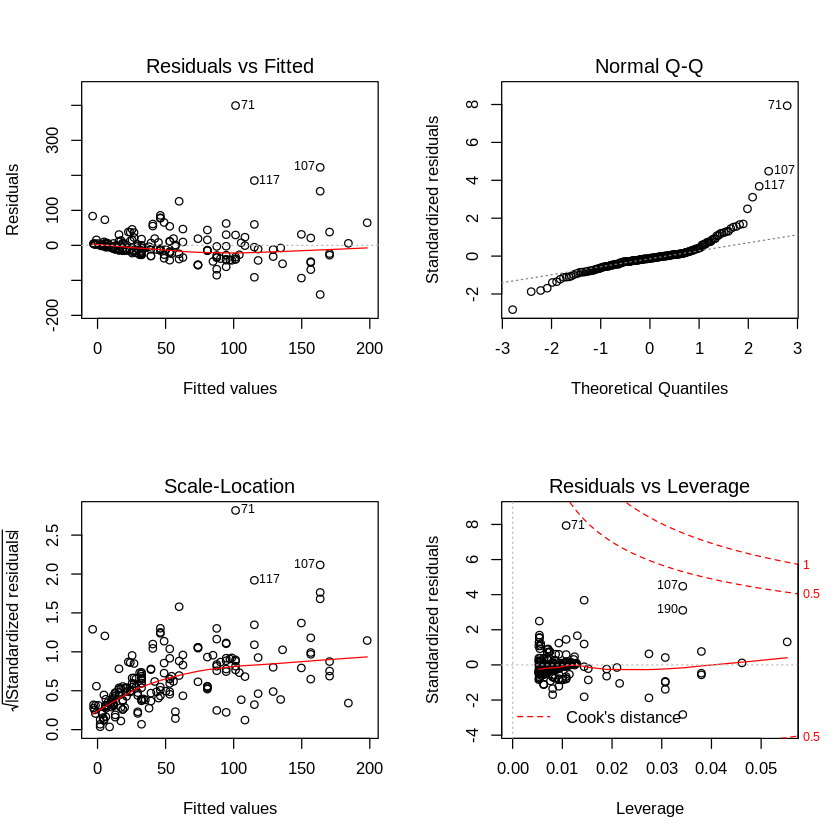

In [6]:
# Load the data
bollywood = read.csv("bollywood_boxoffice.csv")
summary(bollywood)

# Inspect the data
summary(bollywood)
str(bollywood)

# Create the initial linear model
initial_model <- lm(Gross ~ Budget, data = bollywood)

# Summary of the model
summary(initial_model)

# Diagnostic plots
par(mfrow = c(2, 2))
plot(initial_model)

Assumptions Analysis:

- Linearity: The Residuals vs Fitted plot does not show a clear non-linear pattern, but there are some deviations suggesting potential non-linearity.

- Homoskedasticity: The Residuals vs Fitted and Scale-Location plots show a "trumpet" shape, indicating that the variance of the residuals increases with the fitted values, violating the homoskedasticity assumption.

- Independence: The Residuals vs Leverage plot does not show any particular pattern that would suggest dependence among residuals, so this assumption seems to be met.

- Normality: The Normal Q-Q plot shows that the residuals deviate from the line, especially in the tails, indicating a violation of the normality assumption.

#### 3. (b) Transformations

Notice that the Residuals vs. Fitted Values plot has a 'trumpet" shape to it, the points have a greater spread as the Fitted value increases. This means that there is not a constant variance, which violates the homoskedasticity assumption.

So how do we address this? Sometimes transforming the predictors or response can help stabilize the variance. Experiment with transfomrations on `Budget` and/or `Gross` so that, in the transformed scale, the relationship is approximately linear with a constant variance. Limit your transformations to square root, logarithms and exponentiation. 

Note: There may be multiple transformations that fix this violation and give similar results. For the purposes of this problem, the transformed model doesn't have the be the "best" model, so long as it maintains both the linearity and homoskedasticity assumptions.


Call:
lm(formula = log_Gross ~ log_Budget, data = bollywood)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3549 -0.5634  0.0186  0.5664  3.9930 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.44023    0.28410  -5.069 9.51e-07 ***
log_Budget   1.31955    0.07887  16.730  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9029 on 188 degrees of freedom
Multiple R-squared:  0.5982,	Adjusted R-squared:  0.5961 
F-statistic: 279.9 on 1 and 188 DF,  p-value: < 2.2e-16


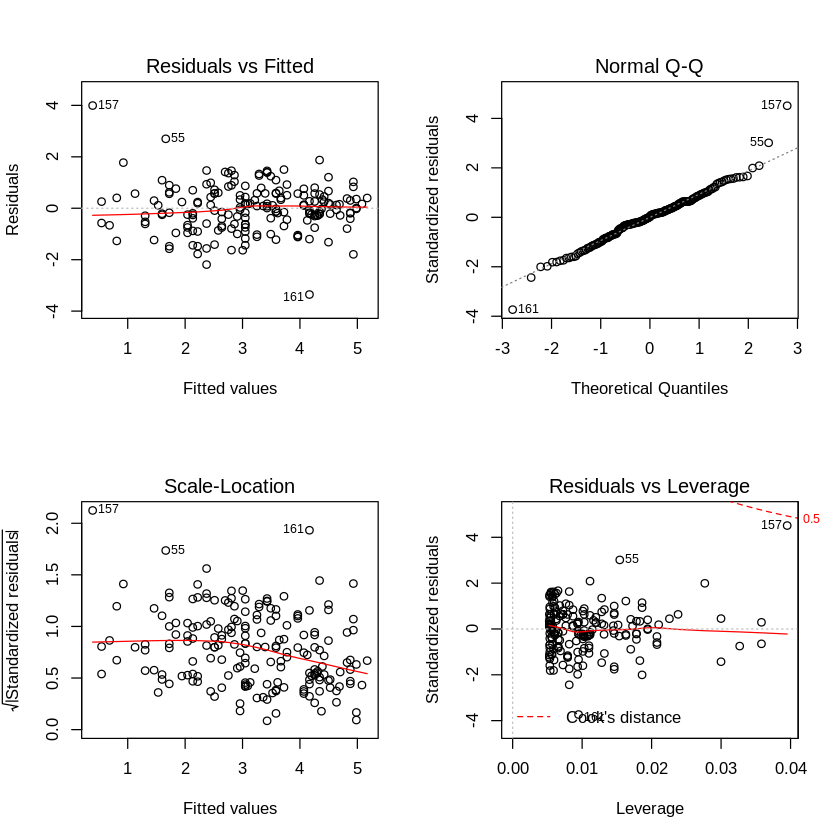

In [7]:
# Apply logarithm transformation to both Gross and Budget
bollywood$log_Gross <- log(bollywood$Gross)
bollywood$log_Budget <- log(bollywood$Budget)

# Create a linear model with the transformed variables
transformed_model <- lm(log_Gross ~ log_Budget, data = bollywood)

# Summary of the transformed model
summary(transformed_model)

# Diagnostic plots for the transformed model
par(mfrow = c(2, 2))
plot(transformed_model)


- Residuals: The distribution of residuals is much tighter around zero, indicating that the model fits the transformed data better.
- Coefficients:

  - The intercept is −1.44023−1.44023.
  - The slope for log_Budget is 1.319551.31955, highly significant with a p-value < 2e-16.

- Model Fit:

    - The Multiple R-squared value is 0.59820.5982, indicating that approximately 59.82% of the variability in log_Gross is explained by log_Budget.
    - The residual standard error is 0.90290.9029, which is reasonably low.

#### 3. (c) Interpreting Your Transformation

You've fixed the nonconstant variance problem! Hurray! But now we have a transformed model, and it will have a different interpretation than a normal linear regression model. Write out the equation for your transformed model. Does this model have an interpretation similar to a standard linear model?

The transformed model is:
$log⁡(Gross)=−1.44023+1.31955log⁡(Budget)$

In terms of the original variables, this model implies:
$Gross=e^(−1.44023)×Budget ^ (1.31955)$

Interpretation:

- e−1.44023 is the scaling factor.
- 1.31955 is the elasticity of Gross with respect to Budget. This means that a 1% increase in Budget results in approximately a 1.32% increase in Gross.